In [92]:
import pylab as plt
import numpy as np

In [93]:
#количество агентов (избирателей)
number_of_agents = 20

# расстояние, на котором их мнения друг на друга влияют(бывшее epsilon)
dist_of_dependence = 0.1

# вес, с которым берется среднее мнений соседей (бывшее h)
weight = 0.1

# количество шагов алгоритма
num_of_steps = 100

# если изначальное распределение ступенчатое -- количество разных мнений (в начале)
num_of_diff_opinions = 20

In [94]:
def easy_ex(num, groups):
    examples = []
    for i in range(groups):
        examples.append(np.random.randint(-groups, groups + 1) / groups)
    result = []
    for i in range(num):
        result.append(np.random.choice(examples))
    return result

Норма перед нормировкой:  1.1
Количество шагов:  100
Мнения:  [-0.7539609436457385, -0.7539172975852492, -0.7538709918681992, -0.753854768756795, -0.7538454026745773, -0.7538406026453228, -0.5409950259028746, -0.24088626681897937, -0.2408824612956544, -0.03805570803049901, -0.0380552318863888, -0.03805251583231186, 0.1046494919455358, 0.4926153308206371, 0.49261714305073023, 0.49262097654547016, 0.6876397813299117, 0.8327849342506632, 0.832785975009913, 1.0]
Сумма мнений:  -0.7245035839897285


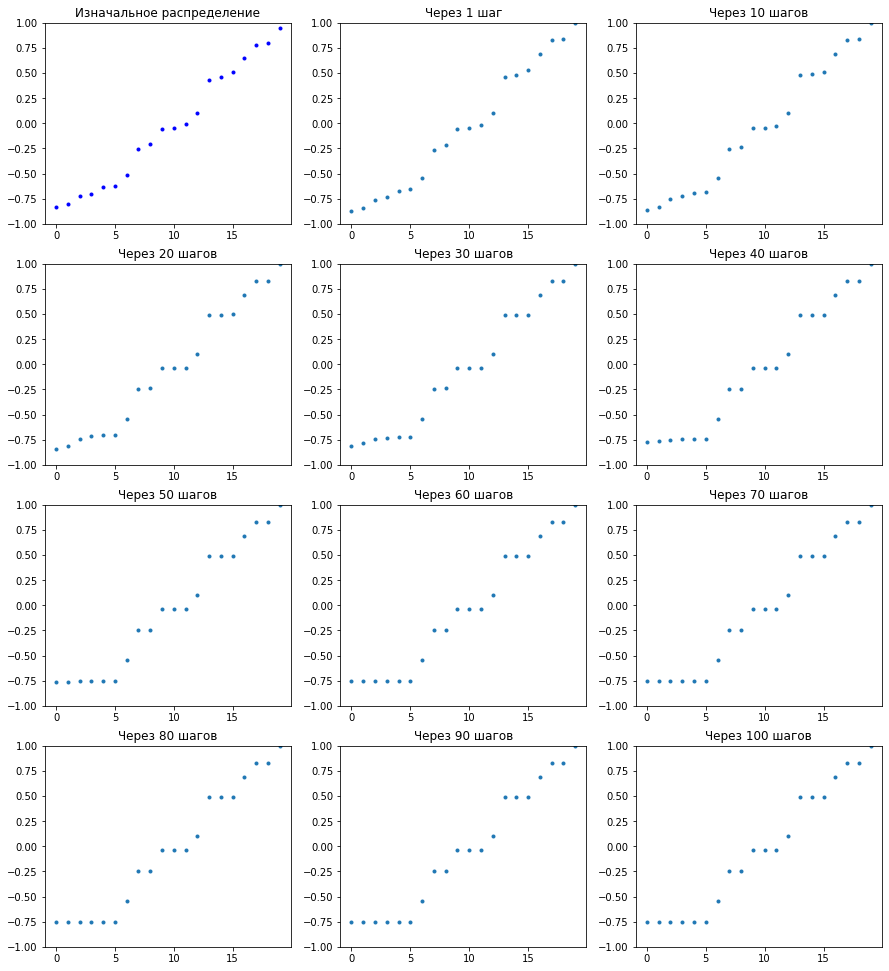

In [95]:
agents = []
Op = []
opinions = []
for i in range(number_of_agents):
    agents.append(i)
    
#    opinions.append(-0.25 + i / ((number_of_agents - 1) * 2))

# Для равномерно распределенных мнений:
    opinions.append(np.random.uniform(-1, 1))

#Для конкретного графика
#k = 2 / number_of_agents 
#for i in range(- number_of_agents // 2, number_of_agents // 2):
#    opinions.append(max(min(2 * (i * k) ** 3 + (i * k) ** 2, 1), -1))
    

# Чтобы ввести мнения вручную (важно ввести нужное количество мнений): 
#opinions = [0.15 for _ in range(number_of_agents // 4)] + [-0.15 for _ in range(number_of_agents // 4)] + [0 for _ in range(number_of_agents // 2)]

# Для ступенчатого распределения с num_of_diff_opinions вариантами
#opinions = easy_ex(number_of_agents, num_of_diff_opinions)

opinions.sort()
Op.append(opinions)

plt.figure(figsize = (15, 150))
plt.subplot(num_of_steps / 3 + 1, 3, 1)
plt.plot(agents, Op[0], 'b.')
plt.ylim(-1, 1)
plt.title('Изначальное распределение')

def new_situation(opin):
    neibours = []
    neibours.clear()
    for i in range(number_of_agents):
        neibours.append([])
        for j in range(number_of_agents):
            if (abs(opin[i] - opin[j]) <= dist_of_dependence):
                neibours[i].append(opin[j])

    new_opinions = []
    new_opinions.clear()
    for i in range(number_of_agents):
        new_opinion = opin[i] + (weight/len(neibours[i]))*sum(neibours[i])
        new_opinions.append(new_opinion)
    norm = max(abs(new_opinions[0]), abs(new_opinions[-1]))
    for i in range(number_of_agents):
        new_opinions[i] /= norm
    return (new_opinions.copy(), norm)



for n in range(1, num_of_steps+1):
    sit = new_situation(Op[-1])
    Op.append(sit[0])
#    print('Шаг ' + str(n - 1) + ': ' + str(sit[-1]))
    if (n % 10 == 0 or n == 1):
        plt.subplot(num_of_steps / 3 + 1, 3, n / 10 + 2)
        plt.plot(agents, Op[-1], '.')
        plt.ylim(-1, 1)
        plt.title(('Через %d шагов' % n) if n > 1 else 'Через 1 шаг' )
    
print('Норма перед нормировкой: ', new_situation(Op[-1])[1])
print('Количество шагов: ', len(Op) - 1)
print('Мнения: ', Op[-1])
print('Сумма мнений: ', sum(Op[-1]))


    
#plt.plot(agents, Op[-1], 'b.')
#plt.ylim(-1, 1)